# Prédiction de prix de cryptomonnaies 

## Notebook d'analyse

### 1.Chargement et fusion des données :

In [2]:
import pandas as pd

xrp_df = pd.read_csv("xrp.csv")
eth_df = pd.read_csv("eth.csv")
sol_df = pd.read_csv("sol.csv")
btc_df = pd.read_csv("btc.csv")


In [3]:
xrp_df["Crypto"] = "XRP"
eth_df["Crypto"] = "ETH"
sol_df["Crypto"] = "SOL"
btc_df["Crypto"] = "BTC"


In [4]:
crypto_df = pd.concat([xrp_df, eth_df, sol_df, btc_df], ignore_index=True)

In [5]:
crypto_df

,Date,Price,Open,High,Low,Vol.,Change %,Crypto
0,03/16/2025,2.3005,2.3882,2.4093,2.2699,375.93M,-3.79%,XRP
1,03/15/2025,2.3912,2.3553,2.4733,2.3544,413.81M,1.53%,XRP
2,03/14/2025,2.3551,2.2441,2.3883,2.2385,537.83M,4.57%,XRP
3,03/13/2025,2.2522,2.2388,2.3448,2.2154,717.08M,0.58%,XRP
4,03/12/2025,2.2391,2.1724,2.2614,2.1365,740.78M,3.19%,XRP
...,...,...,...,...,...,...,...,...
13139,01/21/2013,16.8,15.7,17.0,15.6,61.50K,7.01%,BTC
13140,01/20/2013,15.7,15.6,15.9,15.5,25.98K,0.51%,BTC
13141,01/19/2013,15.6,15.7,15.8,15.3,34.59K,-0.51%,BTC
13142,01/18/2013,15.7,15.5,16.0,15.4,56.10K,1.29%,BTC


### 2.Nettoyage et transformation des données

#### Transformation de la colonne Vol en numerique

In [6]:
def convert_volume(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '').replace(',', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '').replace(',', '')) * 1e6
        elif 'B' in value:
            return float(value.replace('B', '').replace(',', '')) * 1e9
        else:
            return float(value.replace(',', ''))
    return value
crypto_df['Vol.'] = crypto_df['Vol.'].apply(convert_volume)

In [7]:
crypto_df

,Date,Price,Open,High,Low,Vol.,Change %,Crypto
0,03/16/2025,2.3005,2.3882,2.4093,2.2699,375930000.0,-3.79%,XRP
1,03/15/2025,2.3912,2.3553,2.4733,2.3544,413810000.0,1.53%,XRP
2,03/14/2025,2.3551,2.2441,2.3883,2.2385,537830000.0,4.57%,XRP
3,03/13/2025,2.2522,2.2388,2.3448,2.2154,717080000.0,0.58%,XRP
4,03/12/2025,2.2391,2.1724,2.2614,2.1365,740780000.0,3.19%,XRP
...,...,...,...,...,...,...,...,...
13139,01/21/2013,16.8,15.7,17.0,15.6,61500.0,7.01%,BTC
13140,01/20/2013,15.7,15.6,15.9,15.5,25980.0,0.51%,BTC
13141,01/19/2013,15.6,15.7,15.8,15.3,34590.0,-0.51%,BTC
13142,01/18/2013,15.7,15.5,16.0,15.4,56100.0,1.29%,BTC


#### Ajout d'une colonne date en format FR pour l'affichage

In [8]:
crypto_df['Date'] = pd.to_datetime(crypto_df['Date'], format='%m/%d/%Y')
crypto_df['Date'].head()
crypto_df['Date_FR'] = crypto_df['Date'].dt.strftime('%d/%m/%Y')
crypto_df[['Date', 'Date_FR']].head()

,Date,Date_FR
0,2025-03-16,16/03/2025
1,2025-03-15,15/03/2025
2,2025-03-14,14/03/2025
3,2025-03-13,13/03/2025
4,2025-03-12,12/03/2025


#### Traitement des valeurs nulls

In [9]:
crypto_df.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.        605
Change %      0
Crypto        0
Date_FR       0
dtype: int64

In [10]:
crypto_df[crypto_df["Vol."].isnull()]

,Date,Price,Open,High,Low,Vol.,Change %,Crypto,Date_FR
2610,2018-01-21,1.3946,1.601,1.602,1.35,NaN,-12.92%,XRP,21/01/2018
2611,2018-01-20,1.6015,1.5738,1.6573,1.5207,NaN,1.91%,XRP,20/01/2018
2612,2018-01-19,1.5715,1.6071,1.7128,1.5037,NaN,-2.20%,XRP,19/01/2018
2613,2018-01-18,1.607,1.3407,1.7591,1.2597,NaN,19.86%,XRP,18/01/2018
2614,2018-01-17,1.3407,1.1979,1.4281,0.8853,NaN,11.87%,XRP,17/01/2018
...,...,...,...,...,...,...,...,...,...
8697,2020-07-22,1.046,1.004,1.087,1.003,NaN,4.17%,SOL,22/07/2020
8698,2020-07-21,1.004,0.874,1.005,0.874,NaN,-27.41%,SOL,21/07/2020
8699,2020-07-15,1.383,1.115,1.384,1.115,NaN,24.00%,SOL,15/07/2020
8700,2020-07-14,1.115,1.279,1.279,1.114,NaN,-12.78%,SOL,14/07/2020


In [11]:
crypto_df[crypto_df["Crypto"] == "SOL"]["Vol."].isnull().sum()

np.int64(398)

In [12]:
crypto_df[crypto_df["Crypto"] == "ETH"]["Vol."].isnull().sum()

np.int64(8)

In [13]:
crypto_df[crypto_df["Crypto"] == "BTC"]["Vol."].isnull().sum()

np.int64(0)

In [14]:
crypto_df[crypto_df["Crypto"] == "XRP"]["Vol."].isnull().sum()

np.int64(199)

##### Suppression des valeurs manquantes en volume pour le ETH (8 anciennes lignes)

In [15]:
crypto_df[(crypto_df["Crypto"] == "ETH") & (crypto_df["Vol."].isnull())]

,Date,Price,Open,High,Low,Vol.,Change %,Crypto,Date_FR
6373,2017-11-26,464.00,464.00,464.00,464.00,NaN,0.00%,ETH,26/11/2017
6847,2016-08-09,10.16,10.16,10.16,10.16,NaN,0.00%,ETH,09/08/2016
6848,2016-08-08,10.16,10.16,10.16,10.16,NaN,0.00%,ETH,08/08/2016
6849,2016-08-07,10.16,10.16,10.16,10.16,NaN,0.00%,ETH,07/08/2016
6850,2016-08-06,10.16,10.16,10.16,10.16,NaN,0.00%,ETH,06/08/2016
6851,2016-08-05,10.16,10.16,10.16,10.16,NaN,0.00%,ETH,05/08/2016
6852,2016-08-04,10.16,10.16,10.16,10.16,NaN,0.00%,ETH,04/08/2016
6853,2016-08-03,10.16,10.16,10.16,10.16,NaN,0.00%,ETH,03/08/2016


In [16]:
crypto_df = crypto_df.drop(
    crypto_df[(crypto_df["Crypto"] == "ETH") & (crypto_df["Vol."].isnull())].index
)

In [17]:
crypto_df[crypto_df["Crypto"] == "ETH"]["Vol."].isnull().sum()

np.int64(0)

##### Traitement des valeurs manquantes en volume pour le XRP en remplacant par le mediane

In [18]:
crypto_df[(crypto_df["Crypto"] == "XRP") & (crypto_df["Vol."].isnull())]

,Date,Price,Open,High,Low,Vol.,Change %,Crypto,Date_FR
2610,2018-01-21,1.3946,1.601,1.602,1.35,NaN,-12.92%,XRP,21/01/2018
2611,2018-01-20,1.6015,1.5738,1.6573,1.5207,NaN,1.91%,XRP,20/01/2018
2612,2018-01-19,1.5715,1.6071,1.7128,1.5037,NaN,-2.20%,XRP,19/01/2018
2613,2018-01-18,1.607,1.3407,1.7591,1.2597,NaN,19.86%,XRP,18/01/2018
2614,2018-01-17,1.3407,1.1979,1.4281,0.8853,NaN,11.87%,XRP,17/01/2018
...,...,...,...,...,...,...,...,...,...
3701,2015-01-26,0.0147,0.017,0.0175,0.0147,NaN,-13.59%,XRP,26/01/2015
3702,2015-01-25,0.017,0.0174,0.0174,0.0156,NaN,-2.24%,XRP,25/01/2015
3703,2015-01-24,0.0174,0.016,0.0174,0.015,NaN,8.69%,XRP,24/01/2015
3704,2015-01-23,0.016,0.016,0.017,0.016,NaN,0.00%,XRP,23/01/2015


In [19]:
median_volume_xrp = crypto_df.loc[crypto_df["Crypto"] == "XRP", "Vol."].median()
crypto_df.loc[
    (crypto_df["Crypto"] == "XRP") & (crypto_df["Vol."].isnull()), "Vol."
] = median_volume_xrp

In [20]:
crypto_df[crypto_df["Crypto"] == "XRP"]["Vol."].isnull().sum()

np.int64(0)

##### Traitement des valeurs manquantes en volume pour le SOL en remplacant par le mediane

In [21]:
median_volume_sol = crypto_df.loc[crypto_df["Crypto"] == "SOL", "Vol."].median()
crypto_df.loc[
    (crypto_df["Crypto"] == "SOL") & (crypto_df["Vol."].isnull()), "Vol."
] = median_volume_sol

In [22]:
crypto_df[crypto_df["Crypto"] == "SOL"]["Vol."].isnull().sum()

np.int64(0)

##### Chnagement de type des colonnes

In [23]:
crypto_df.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.               float64
Change %            object
Crypto              object
Date_FR             object
dtype: object

In [24]:
crypto_df['Price'] = crypto_df['Price'].astype(str).str.replace(',', '', regex=False)

In [25]:
numeric_cols = ['Price', 'Open', 'High', 'Low', 'Vol.']
crypto_df[numeric_cols] = crypto_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
crypto_df['Change %'] = crypto_df['Change %'].astype('string')
crypto_df['Crypto'] = crypto_df['Crypto'].astype('string')
crypto_df['Date_FR'] = pd.to_datetime(crypto_df['Date'], format='%m/%d/%Y')

In [26]:
crypto_df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %    string[python]
Crypto      string[python]
Date_FR     datetime64[ns]
dtype: object

### 3.Exploration des données

#### exploration descriptive

In [27]:
crypto_df.describe() 

,Date,Price,Open,High,Low,Vol.,Date_FR
count,13136,13136.000000,8608.000000,8584.000000,8640.000000,1.313600e+04,13136
mean,2020-04-16 03:34:18.708891648,6487.391681,132.053484,134.004603,130.454822,2.084847e+08,2020-04-16 03:34:18.708891648
min,2013-01-17 00:00:00,0.003600,0.003600,0.003600,0.003000,0.000000e+00,2013-01-17 00:00:00
25%,2017-10-07 00:00:00,0.837050,0.435675,0.449650,0.419525,1.197850e+05,2017-10-07 00:00:00
50%,2020-09-16 00:00:00,213.820000,13.945000,14.282500,13.536500,1.010000e+06,2020-09-16 00:00:00
75%,2022-12-16 06:00:00,2869.875000,199.942000,205.868500,195.045000,2.521250e+07,2022-12-16 06:00:00
max,2025-03-17 00:00:00,106157.200000,997.600000,997.510000,999.700000,1.383000e+10,2025-03-17 00:00:00
std,NaN,16130.471536,204.303592,205.907334,203.135797,6.028918e+08,NaN


In [28]:
# groupé par crypto

In [29]:
numeric_cols = ['Price', 'Open', 'High', 'Low', 'Vol.']

crypto_grouped_stats = crypto_df.groupby('Crypto')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

crypto_grouped_stats = crypto_grouped_stats.round(2)

crypto_grouped_stats


Price                                              Open          \
            mean   median       std   min        max count    mean  median   
Crypto                                                                       
BTC     18218.64  7682.20  23658.38  15.5  106157.20  4442  400.99  379.80   
ETH      1265.05   685.22   1245.40   6.7    4808.38  3286  238.91  199.21   
SOL        77.89    40.44     70.93   1.0     261.82  1702   77.81   40.31   
XRP         0.45     0.35      0.49   0.0       3.29  3706    0.45    0.35   

                       ...     Low                               Vol.  \
           std    min  ...     std    min     max count          mean   
Crypto                 ...                                              
BTC     235.58  14.70  ...  236.03  14.60  999.70  1488  1.391094e+07   
ETH     206.84   6.68  ...  205.64   5.86  999.50  1744  9.244443e+06   
SOL      70.95   0.87  ...   68.13   0.87  252.83  1702  1.155516e+07   
XRP       0.49   0.00  ...    0.46   0.00    3.18  3706  7.088015e+08   

                                                                
             median           std      min           max count  
Crypto                                                          
BTC         84580.0  1.642506e+08    260.0  4.470000e+09  4442  
ETH        781595.0  8.605326e+07      0.0  1.790000e+09  3286  
SOL       5315000.0  3.281581e+07  85000.0  3.977200e+08  1702  
XRP     443130000.0  9.489008e+08      0.0  1.383000e+10  3706  

[4 rows x 30 columns]

#### Analyse des tendances temporelles 

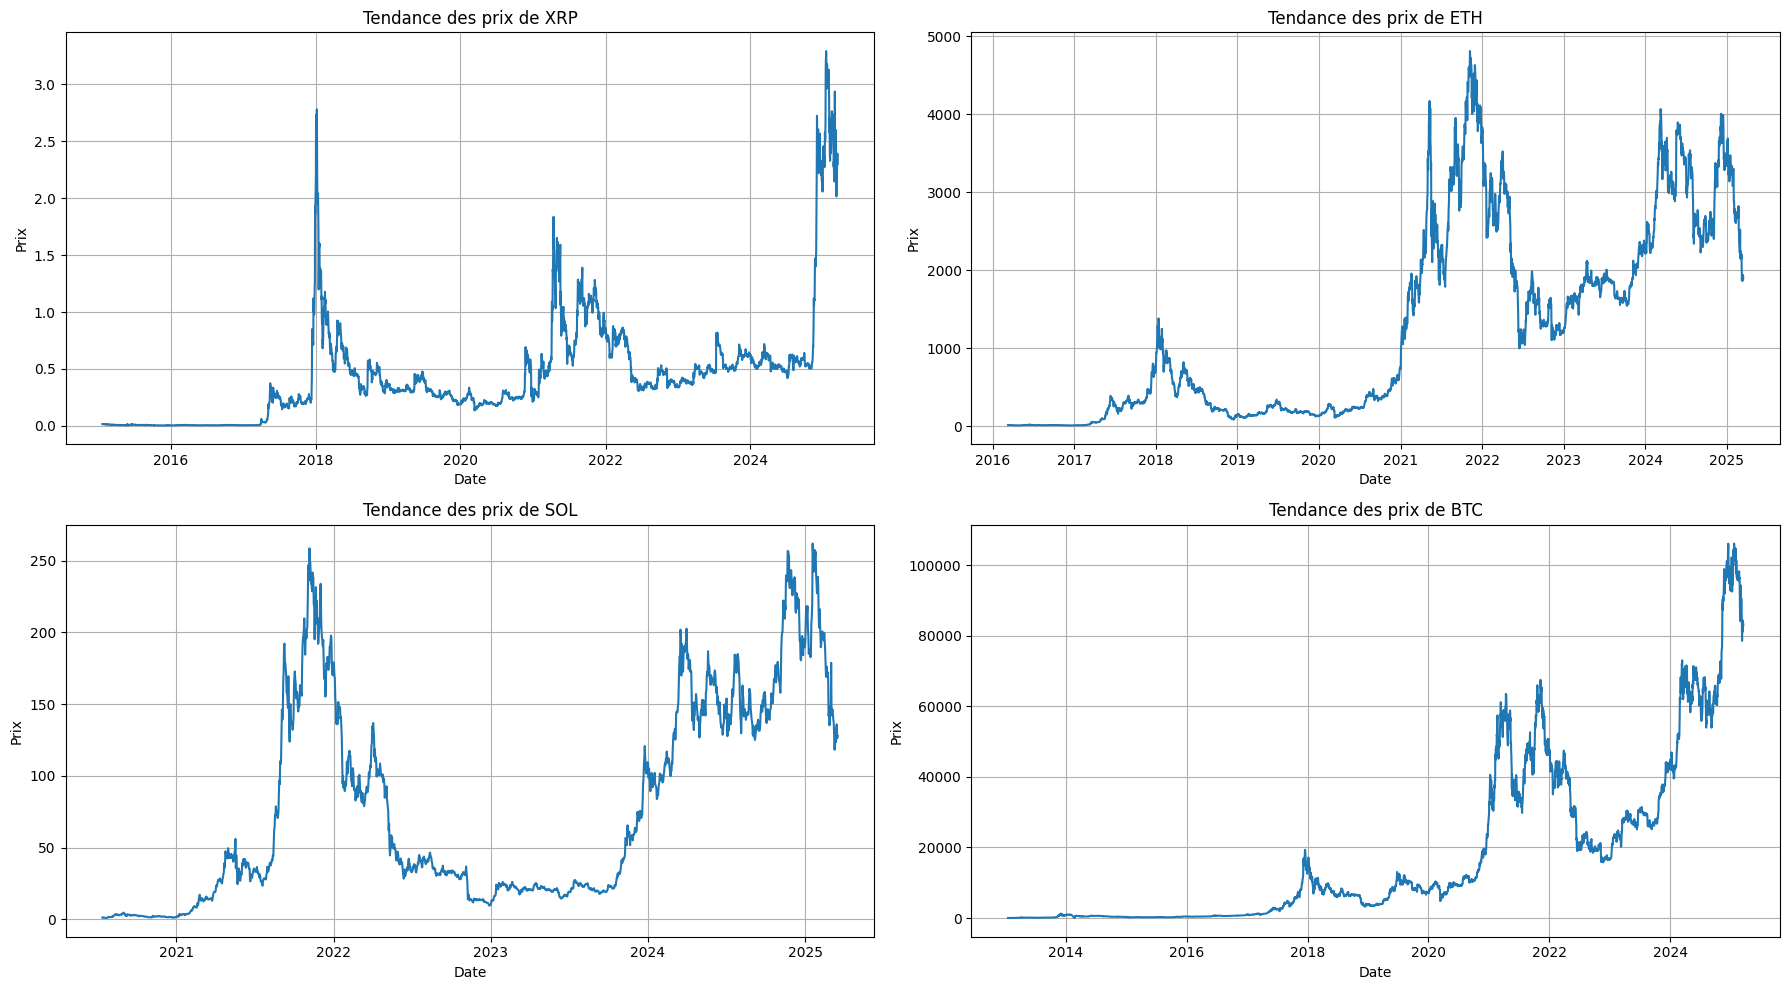

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Définir la figure avec 4 sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Récupérer les noms uniques des cryptos
cryptos = crypto_df['Crypto'].unique()

# Parcourir chaque crypto et afficher sur un sous-graphique différent
for ax, crypto in zip(axes.flatten(), cryptos):
    crypto_data = crypto_df[crypto_df['Crypto'] == crypto]
    sns.lineplot(data=crypto_data, x='Date', y='Price', ax=ax)
    ax.set_title(f"Tendance des prix de {crypto}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Prix')
    ax.grid(True)

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()
plt.show()


#### Les prix restent relativement stables la plupart du temps, jusqu’à l’arrivée de périodes appelées bullruns (2018, fin 2021/début 2022, fin 2024/début 2025).
#### Lors des bullruns, les prix montent significativement à de nouveaux sommets (ATH), puis redescendent après, mais restent à un niveau supérieur à celui d’avant le bullrun.
#### On observe un cycle approximatif de 3 ans pour ces mouvements de forte hausse.
#### ➡️ une forte composante cyclique dans les prix des cryptos.

#### Visualisation des distributions des prix

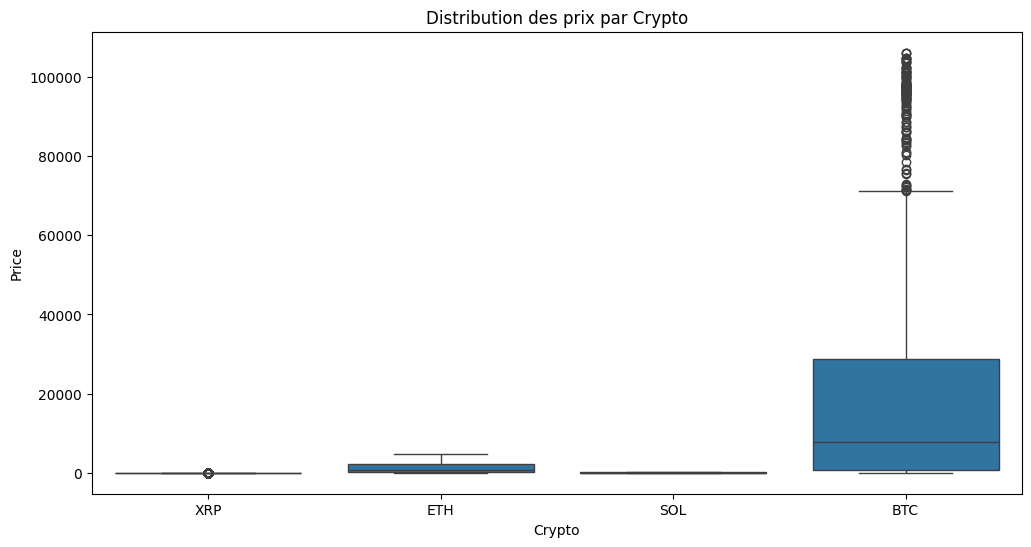

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=crypto_df, x='Crypto', y='Price')
plt.title('Distribution des prix par Crypto')
plt.show()

#### Le BTC présente naturellement une distribution beaucoup plus large (variations importantes), due à sa valeur absolue élevée.
#### Les autres cryptos (XRP, ETH, SOL) présentent des distributions moins larges, mais tout aussi volatiles relativement à leurs niveaux de prix respectifs.
#### ➡️ Cela confirme la forte volatilité intrinsèque des cryptomonnaies.

#### Analyse des volumes échangés

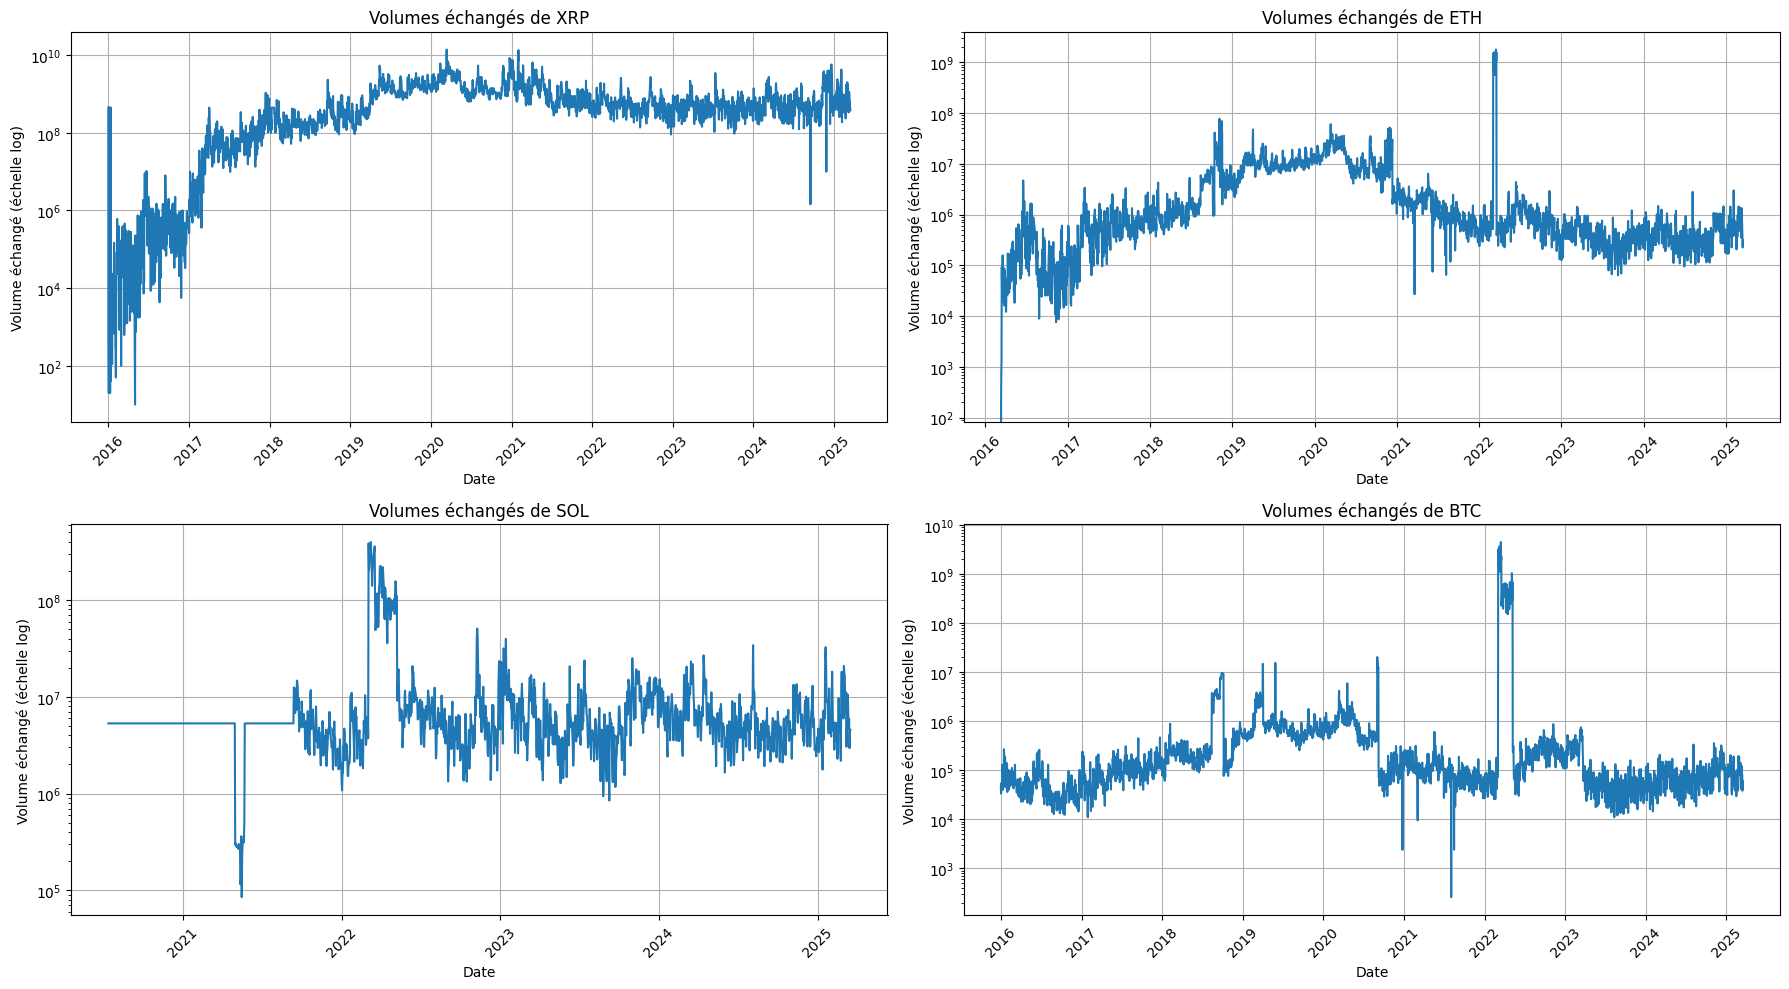

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

cryptos = crypto_df['Crypto'].unique()

for ax, crypto in zip(axes.flatten(), cryptos):
    crypto_data = crypto_df[crypto_df['Crypto'] == crypto]
    if crypto != "SOL":
        crypto_data = crypto_data[crypto_data['Date'] >= "2016-01-01"]
        
    sns.lineplot(data=crypto_data, x='Date', y='Vol.', ax=ax)
    
    ax.set_title(f"Volumes échangés de {crypto}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume échangé (échelle log)')
    ax.set_yscale('log')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # Rotation pour lisibilité

plt.tight_layout()
plt.show()


#### Des pics nets de volumes échangés apparaissent lors des périodes de bullruns (forte hausse du marché), montrant une relation claire entre volumes échangés et augmentation des prix.
#### ➡️ Le volume est un indicateur clé qui pourrait servir à améliorer la précision des modèles prédictifs.

#### Relation Volume prix 

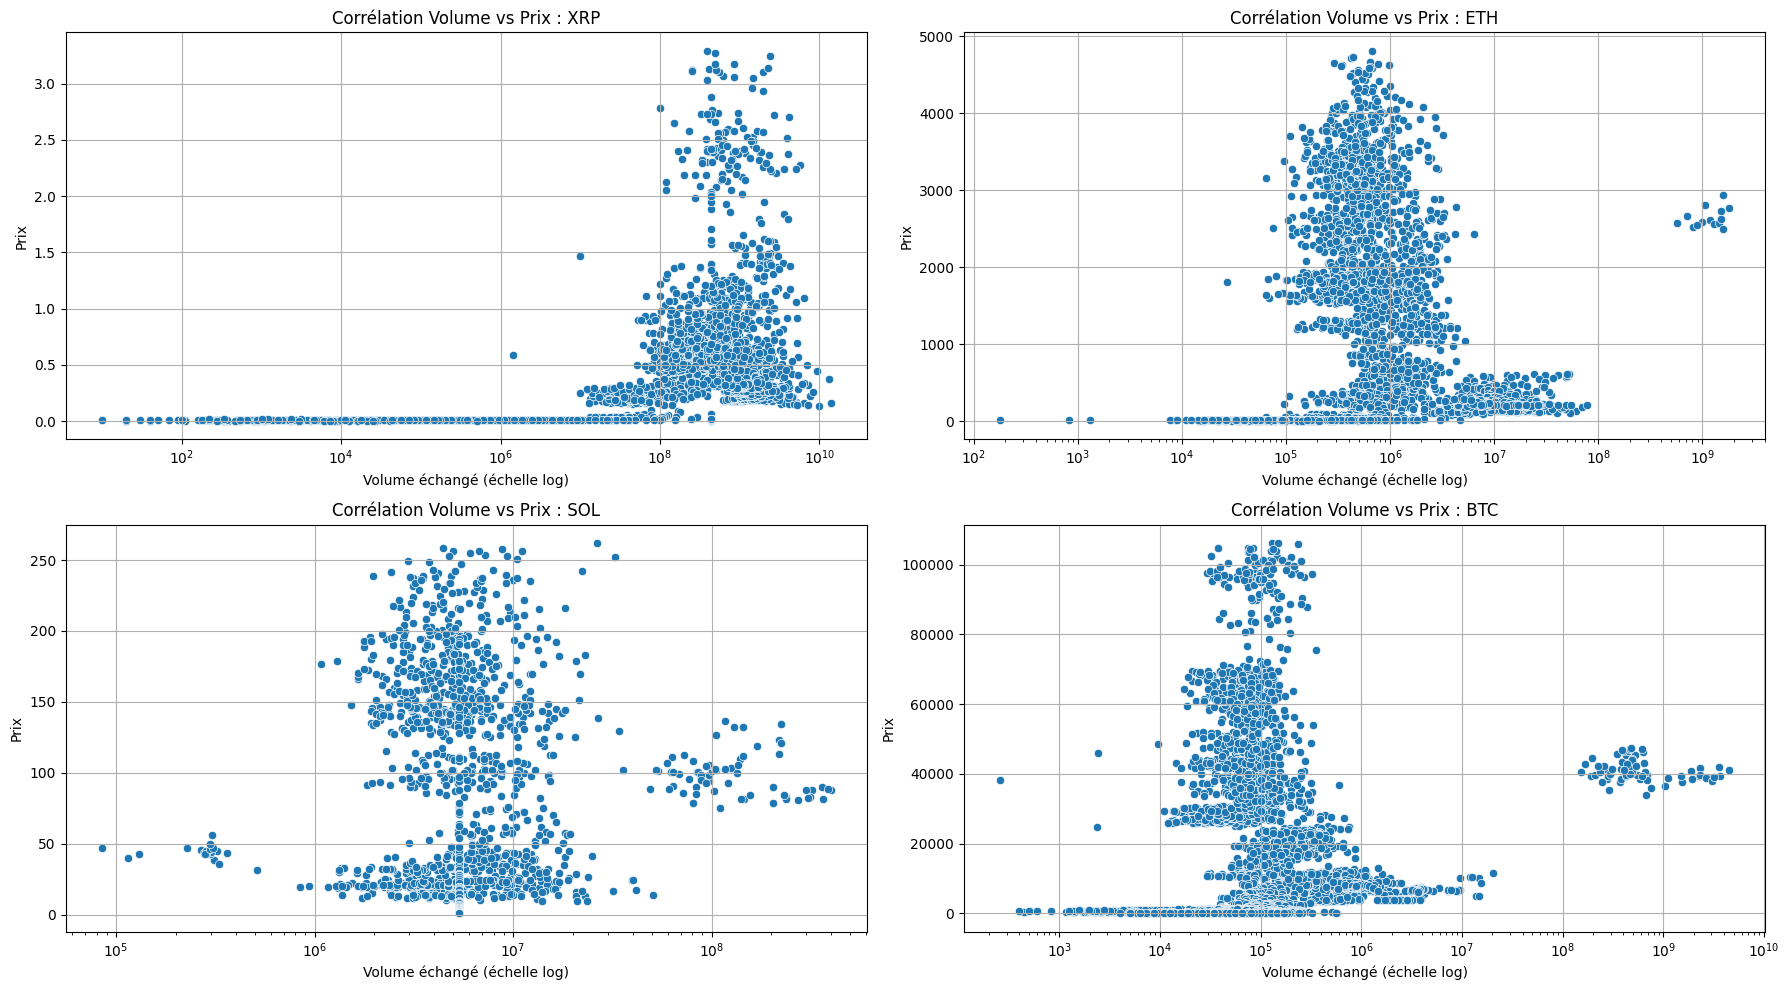

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Récupérer les noms uniques des cryptos
cryptos = crypto_df['Crypto'].unique()

for ax, crypto in zip(axes.flatten(), cryptos):
    crypto_data = crypto_df[crypto_df['Crypto'] == crypto]
    
    sns.scatterplot(data=crypto_data, x='Vol.', y='Price', ax=ax)
    ax.set_title(f'Corrélation Volume vs Prix : {crypto}')
    ax.set_xlabel('Volume échangé (échelle log)')
    ax.set_ylabel('Prix')
    
    # Passage à l'échelle logarithmique sur l'axe des volumes
    ax.set_xscale('log')

    ax.grid(True)

plt.tight_layout()
plt.show()


#### Corrélation entre les cryptos

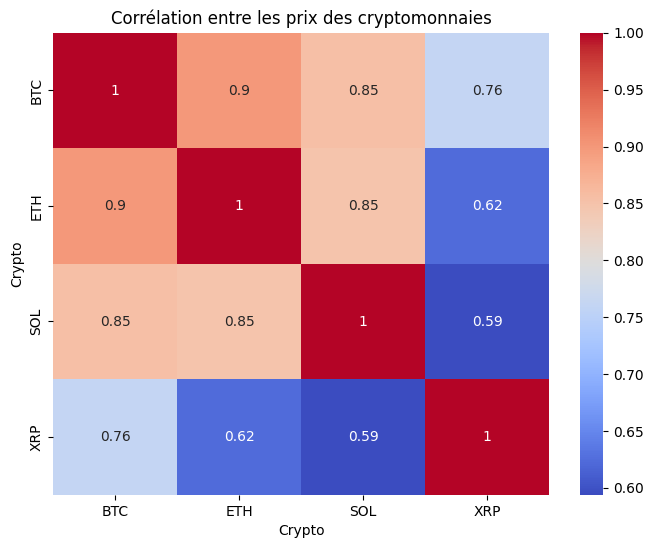

In [41]:
crypto_pivot = crypto_df.pivot_table(values='Price', index='Date', columns='Crypto')

corr_matrix = crypto_pivot.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les prix des cryptomonnaies')
plt.show()


#### Une forte corrélation entre le BTC et les autres cryptos est observée. Cela signifie que le BTC influence significativement les mouvements des autres cryptomonnaies (ETH, SOL, XRP).
#### ➡️ Utiliser le prix du BTC comme variable explicative pourrait améliorer les prédictions des autres cryptomonnaies.

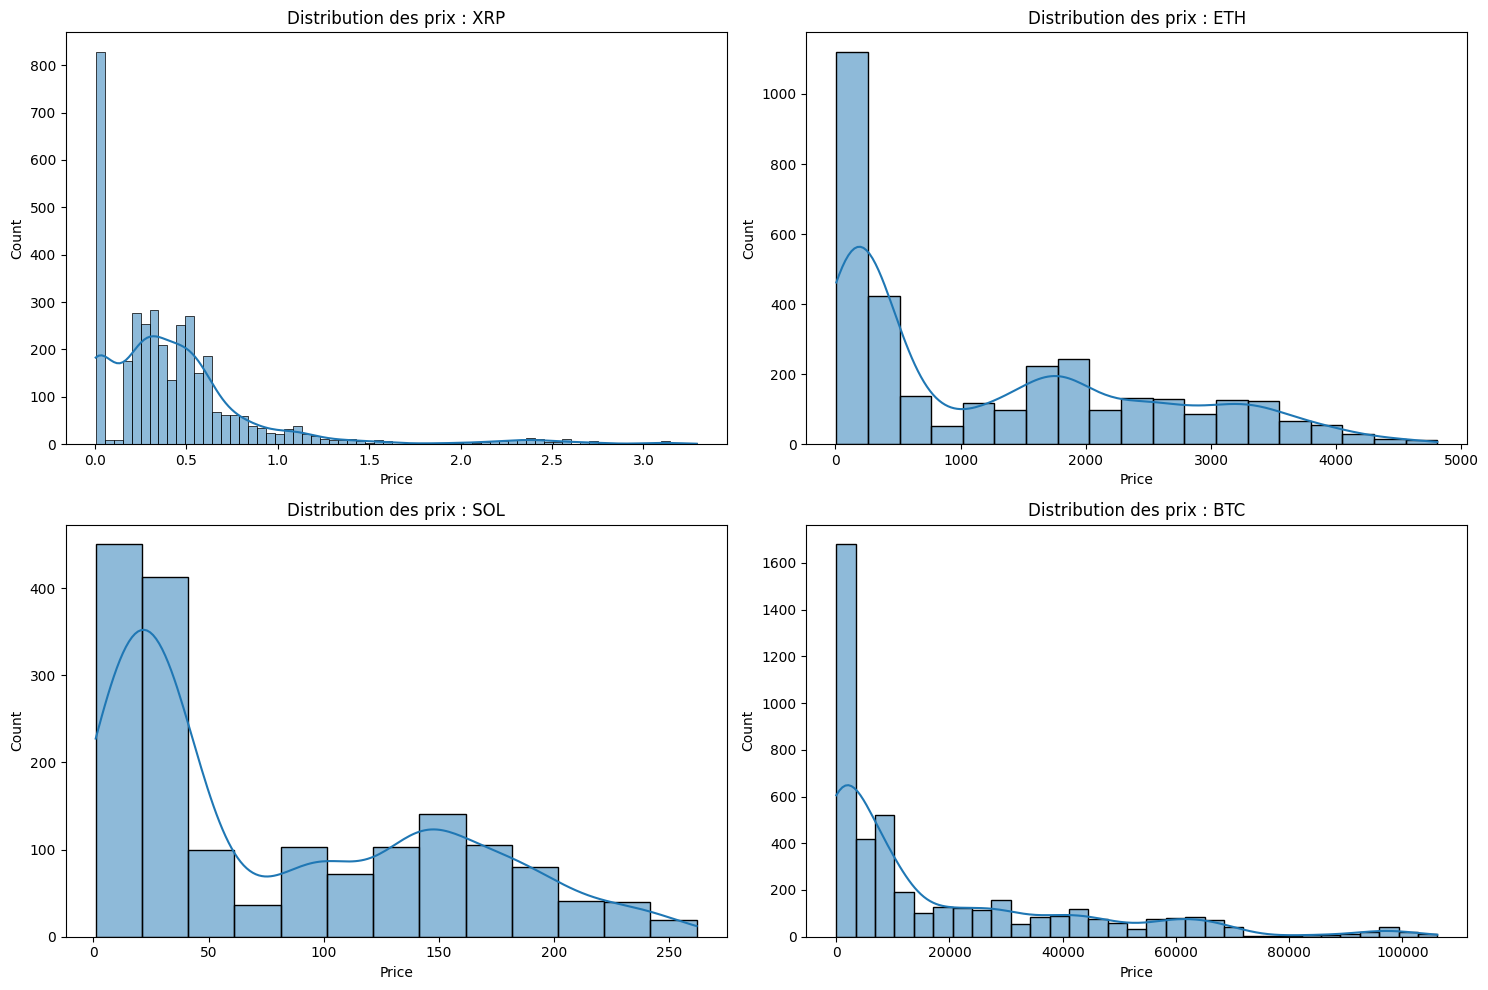

In [34]:
plt.figure(figsize=(15,10))

for i, crypto in enumerate(crypto_df['Crypto'].unique(), 1):
    plt.subplot(2, 2, i)
    sns.histplot(crypto_df[crypto_df['Crypto']==crypto]['Price'], kde=True)
    plt.title(f'Distribution des prix : {crypto}')

plt.tight_layout()
plt.show()


#### Les fortes hausses observées ne sont pas de réels outliers, mais plutôt des caractéristiques naturelles du marché crypto.
#### Ces hausses sont normales et attendues, dues à la spéculation et à la volatilité du marché crypto.
#### ➡️ Aucune suppression des valeurs extrêmes nécessaire, mais il faudra des modèles capables de gérer une volatilité importante.

#### Effet saisonnier mensuel

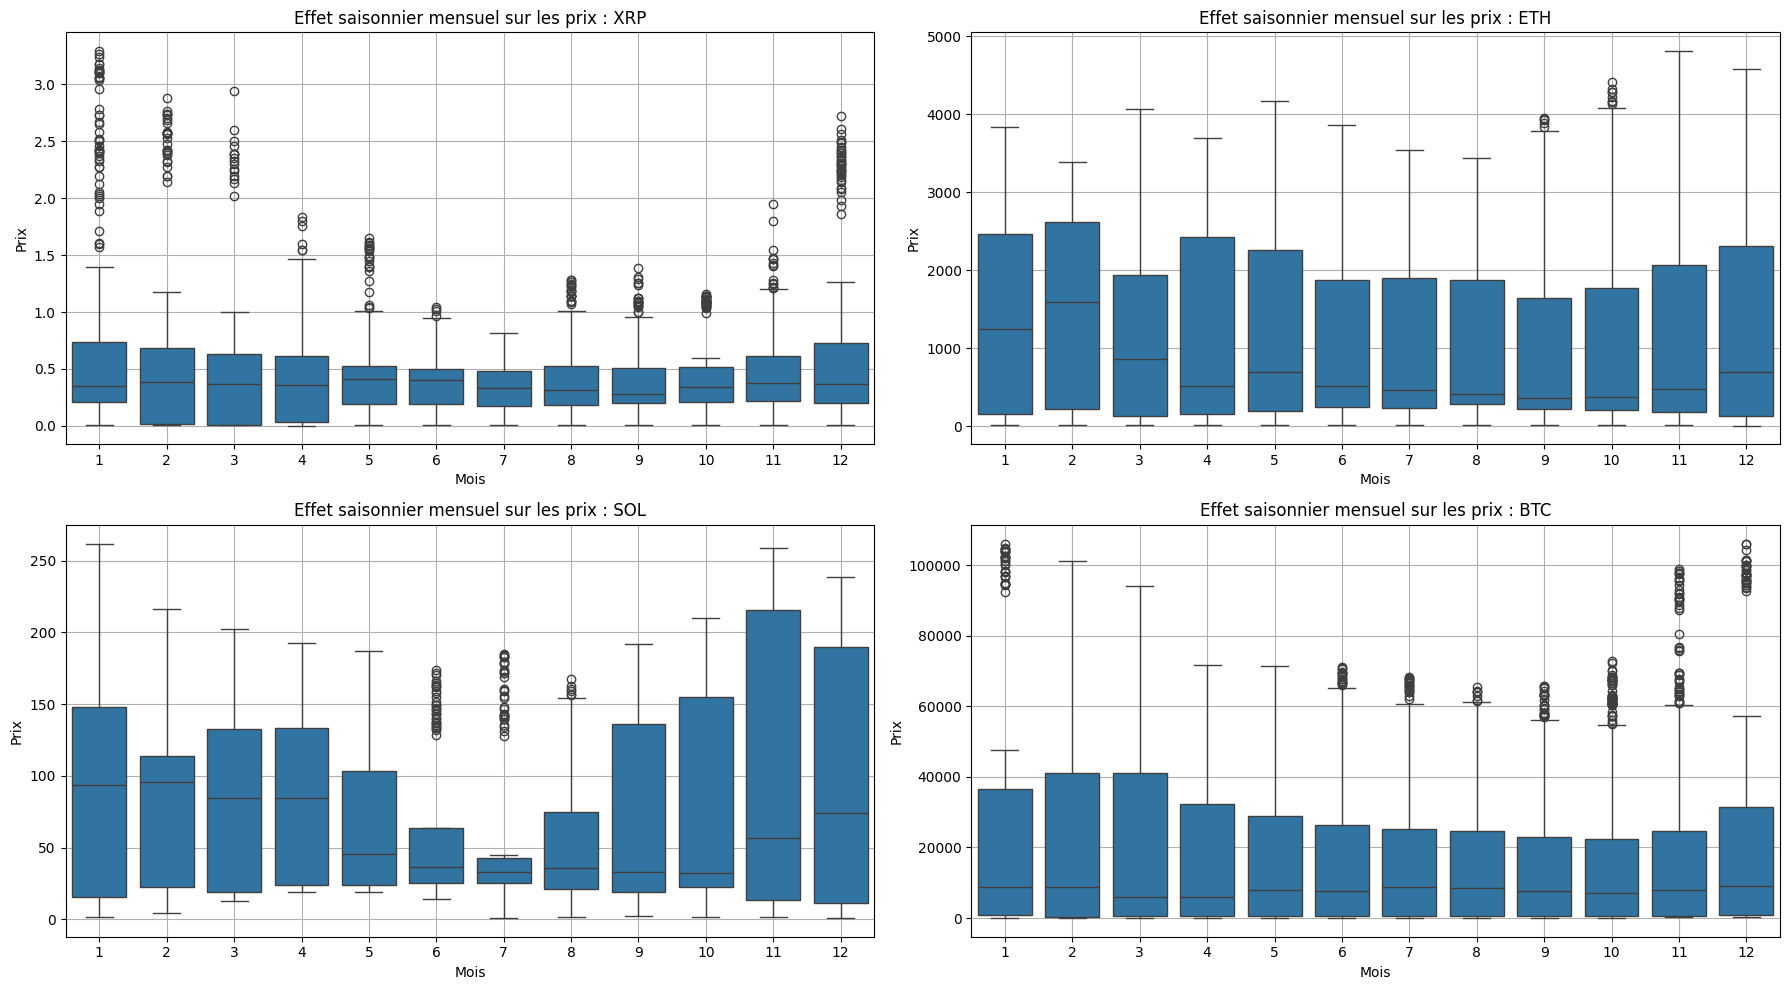

In [35]:
crypto_df['Month'] = crypto_df['Date'].dt.month
crypto_df['Year'] = crypto_df['Date'].dt.year

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Liste des cryptos
cryptos = crypto_df['Crypto'].unique()

# Afficher clairement un boxplot par crypto
for ax, crypto in zip(axes.flatten(), cryptos):
    sns.boxplot(data=crypto_df[crypto_df['Crypto'] == crypto], x='Month', y='Price', ax=ax)
    ax.set_title(f'Effet saisonnier mensuel sur les prix : {crypto}')
    ax.set_xlabel('Mois')
    ax.set_ylabel('Prix')
    ax.grid(True)

plt.tight_layout()
plt.show()


#### On observe clairement une augmentation saisonnière des prix principalement en fin et début d'année (novembre, décembre, janvier, février).
#### Ces périodes coïncident souvent avec les périodes de bullruns et semblent présenter une cyclicité régulière tous les 3 ans environ.
#### ➡️ L’utilisation d’un modèle capable de capturer des effets saisonniers (mensuels/annuels) peut être utile.

#### téléchargement de dataset nettoyer en csv pour la prochaine étape 

In [46]:
crypto_df.to_csv("Crypto.csv")